In [23]:

import os
import random
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
ds_path = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"

classes=[]
class_counts={}

for class_name in os.listdir(ds_path):
    
    class_path = os.path.join(ds_path, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        classes.append(class_name)
        class_counts[class_name] = len(images)

classes, class_counts

(['planet',
  'galaxy',
  'black hole',
  'asteroid',
  'comet',
  'star',
  'constellation',
  'nebula'],
 {'planet': 1472,
  'galaxy': 3984,
  'black hole': 656,
  'asteroid': 283,
  'comet': 416,
  'star': 3269,
  'constellation': 1552,
  'nebula': 1192})

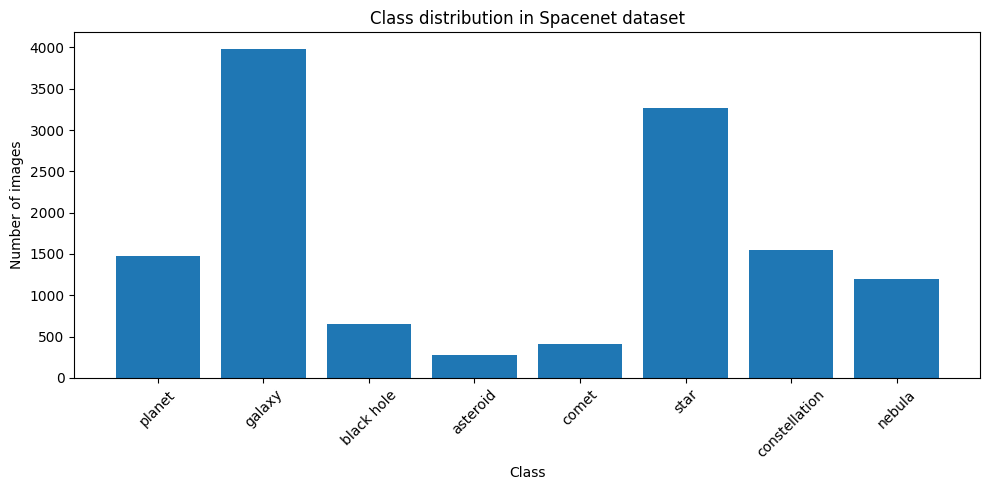

In [25]:
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.title("Class distribution in Spacenet dataset")
plt.tight_layout()
plt.show()


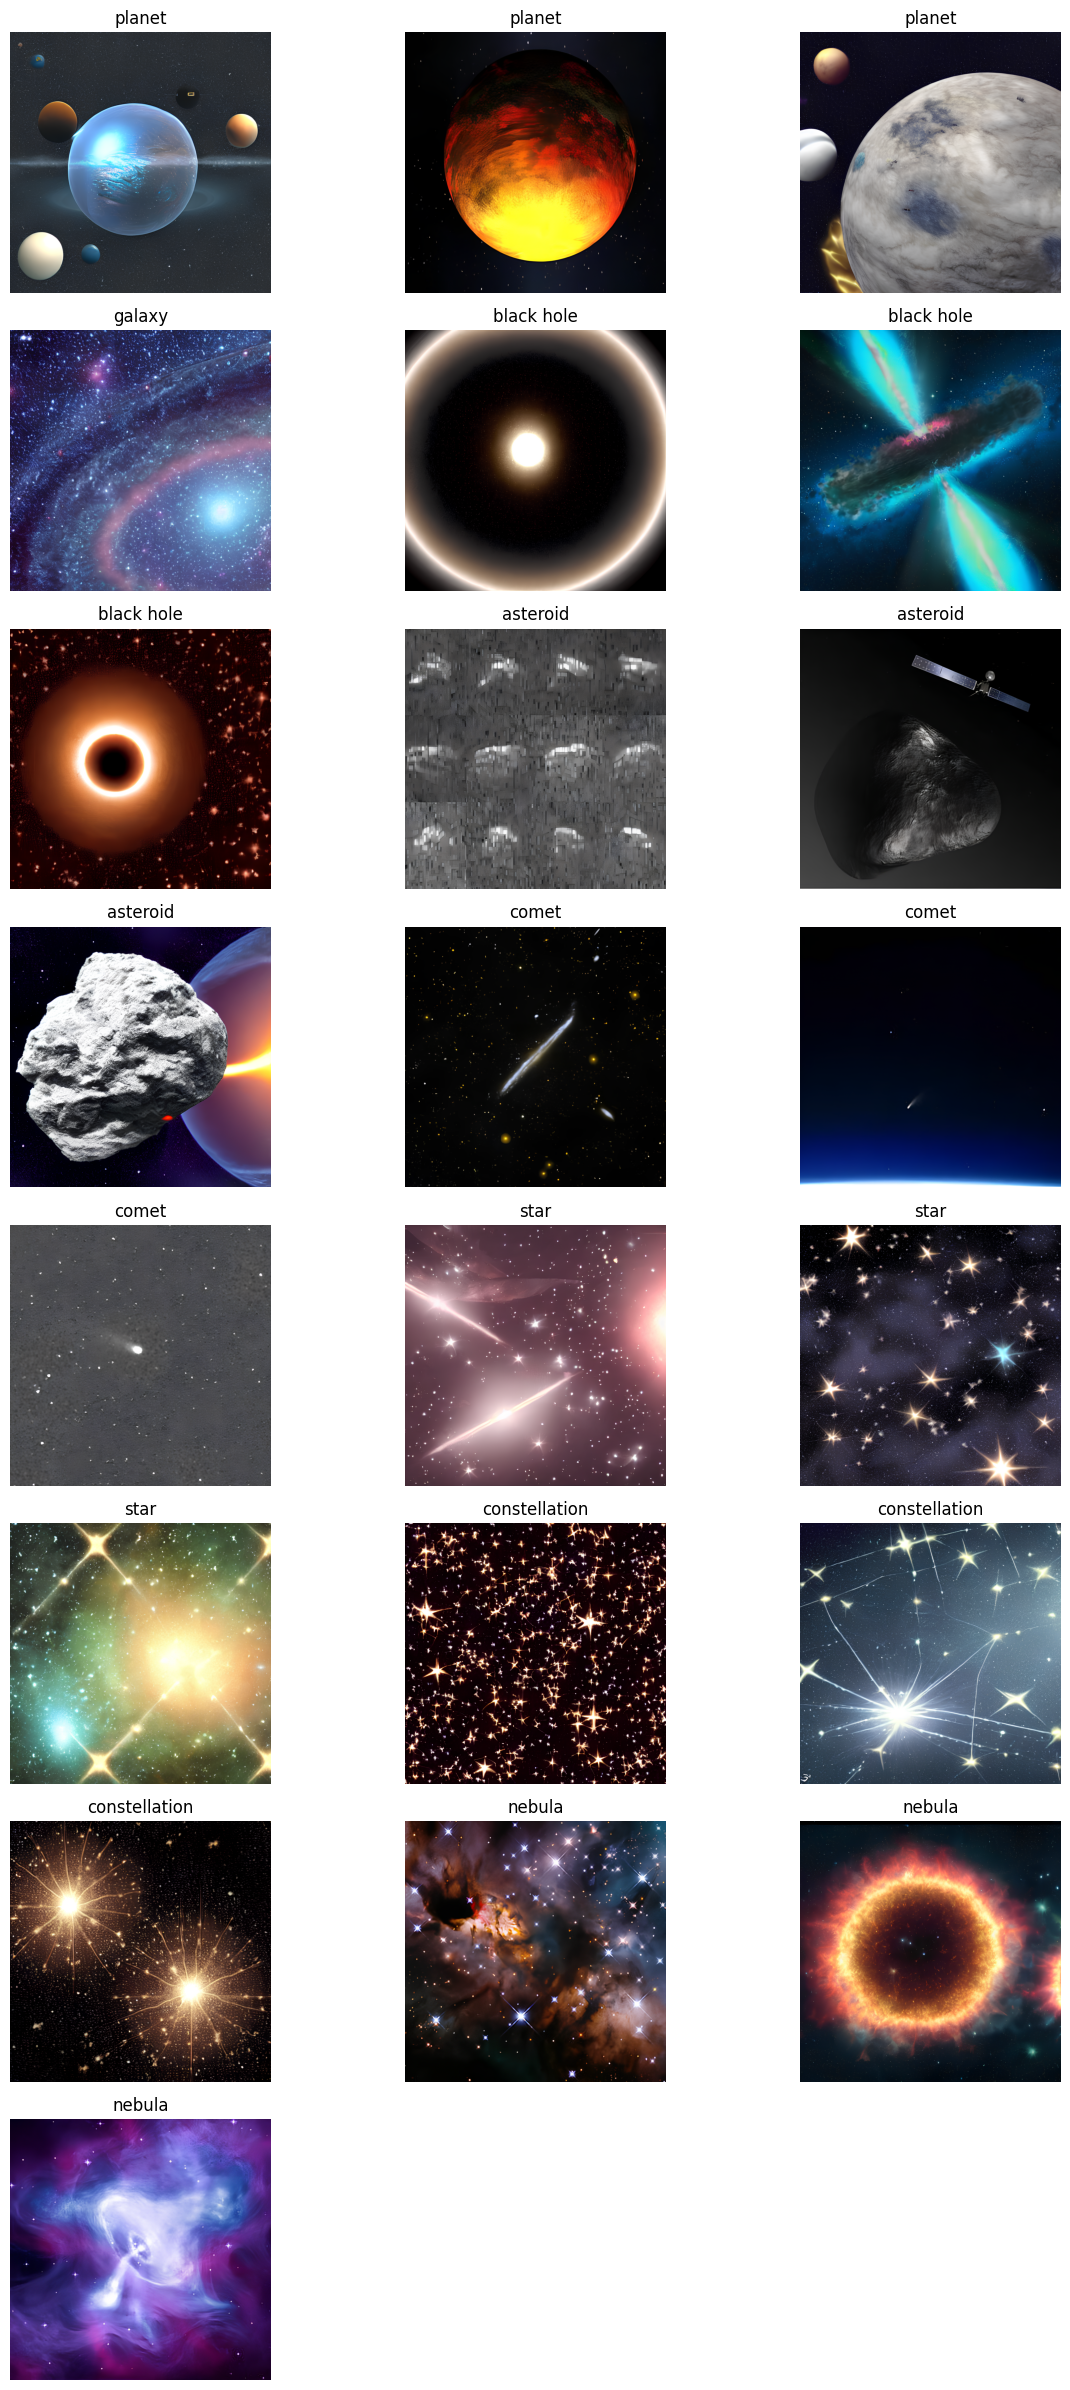

In [26]:
from PIL import UnidentifiedImageError

samples_per_class = 3
plt.figure(figsize=(12, len(classes) * 3))

plot_idx = 1
for class_name in classes:
    class_path = os.path.join(ds_path, class_name)
    images = os.listdir(class_path)
    sampled_images = random.sample(images, min(samples_per_class, len(images)))

    for img_name in sampled_images:
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)

            plt.subplot(len(classes), samples_per_class, plot_idx)
            plt.imshow(img)
            plt.axis("off")
            plt.title(class_name)
            plot_idx += 1

        except (UnidentifiedImageError, OSError):
            continue

plt.tight_layout()
plt.show()


In [27]:
image_sizes=[]

for class_name in classes:
    class_path = os.path.join(ds_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size) 
        except:
            pass

image_sizes[:5]


[(2048, 2048), (2048, 2048), (2048, 2048), (2048, 2048), (2048, 2048)]

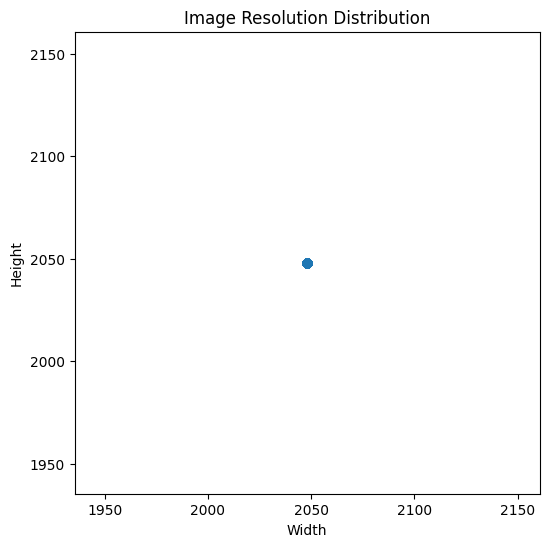

In [28]:
widths,heights=zip(*image_sizes)

plt.figure(figsize=(6,6))
plt.scatter(widths, heights, alpha=0.4)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution")
plt.show()


In [29]:
resolution_counts =Counter(image_sizes)
resolution_counts.most_common(5)


[((2048, 2048), 11448)]

In [30]:
formats=[]

for class_name in classes:
    class_path = os.path.join(ds_path, class_name)
    for img_name in os.listdir(class_path):
        ext = os.path.splitext(img_name)[1].lower()
        formats.append(ext)

format_counts=Counter(formats)
format_counts


Counter({'.png': 12824})